**39\. Methodenseminar - Big Data Module II: Introduction to Social Network Science with Python**

# Community detection algorithms 

**Author**: <a href='https://marcosoliveira.info/'>Marcos Oliveira</a>, GESIS - Leibniz Institute for the Social Sciences

**Version**: 29 May 2019

**Description**: This is an introduction to community detection in Python using the <code>networkx</code> library. 
    
## Imports and Settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import networkx as nx

In [3]:
import community as louvain
from community import modularity

<div class="alert alert-danger">
    You need the <code>python-louvain</code> library in your machine. This <a href=https://github.com/taynaud/python-louvain>page</a> might help you.
</div>

In [4]:
from itertools import cycle
def color_cycle():
    """
        This is a cycle of colors.
    """
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
    return cycle(colors)
colors = color_cycle()

def to_community_list(node_community_dict):
    """
        This transforms {0: 0, 1: 1:, 2: 0, 3: 1} into [[0, 2], [1, 3]].
    """
    partition_dict = {}
    for v, k in zip(node_community_dict.keys(), node_community_dict.values()):
        if k not in partition_dict:
            partition_dict[k] = []
        partition_dict[k].append(v)
    return list(partition_dict.values())

# Exercises
For the exercises, we will use data from the Twitter.

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


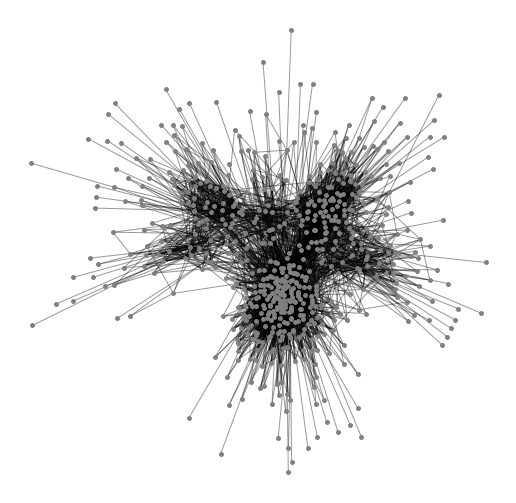

In [5]:
users_data = pd.read_csv('../data/btw13/users.txt', header='infer', delimiter='\t', encoding='utf-8', index_col="user_id")
retweet_data = pd.read_csv('../data/btw13/retweet.txt', header='infer', delimiter='\t', encoding='utf-8', index_col="transaction_id")
retweet_network = nx.Graph()  # an undirected network
retweet_network.add_nodes_from(users_data.index)
retweet_network.add_edges_from(retweet_data.values)
largest_component = max(nx.connected_component_subgraphs(retweet_network), key=len)

plt.figure(figsize=(9, 9)) 
pos = nx.spring_layout(largest_component)
nx.draw_networkx_nodes(largest_component, pos=pos, node_size=15, edge_color='b', node_color='gray')
nx.draw_networkx_edges(largest_component, pos, width=1.0, alpha=0.4)
plt.axis('off')
plt.show()

<div class="alert alert-success">
    <b>Exercise 1</b> 
    
Find the communities in the Twitter retweet network using different methods. Compare the results using modularity, performance, and coverage. 
    
</div>

<div class="alert alert-success">
    <b>Exercise 2</b> 
   
   Are these communities related to any meta data? This data set contains metadata about the individuals. 
    
   For each community, describe and plot the distribution of the parties.
</div>

In [6]:
users_data.head()

,user,name,party_id
user_id,,,
0,__juh__,Jan Ulrich Hasecke,5
1,_florianeckert,Florian Eckert,2
2,_G_Baer_,Wilhelm A. Frömgen,5
3,_noujoum,Miriam Seyffarth,5
4,_rmrf,Frank Zimmermann,5


<div class="alert alert-success">
    <b>Exercise 3</b> 

Real-world networks are heterogeneous. For each community in the network, calculate the average degree, the clustering coefficient, and the average shortest path length. Compare the results with these statistics for the whole network.
</div>

<div class="alert alert-success">
    <b>Exercise 4</b> 
    
Create a graph for each community in the network. For each of them, calculate the average degree, the clustering coefficient, and the average shortest path length. Compare with the values you found above. 
    
</div>

<div class="alert alert-success">
    <b>Exercise 5</b> 
    
<code>retweet_network</code> is a unweighted network. How the weights influence the community detection? Reconstruct the network using weights (i.e., the number of times a user A retweet user B), find the communities, and compare with the ones found above.


**Hint**: <code>retweet_data.groupby(['user_id_retweeter', 'user_id_retweetee']).size().reset_index()</code>
</div>

<div class="alert alert-success">
    <b>Exercise 6</b> 
    
Create the network of communities: each node represents a community and the edge weight represents the number of connection between communities. Self-edges refers to the number of intra-community edges.
</div>